# Pima Diabetes 
### Description of Pima Diabetes dataset

#### Data Set Information:
Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage. ADAP is an adaptive learning routine that generates and executes digital analogy of perceptron-like devices. It is a unique algorithm; see the paper for details.

#### Attribute Information:
- Pregnancies : Number of times pregnant

- Glucose : Plasma glucose concentration a 2 hours in an oral glucose tolerance test (mg/dl) A 2-hour value between 140 and 200 mg/dL (7.8 and 11.1 mmol/L) is called impaired glucose tolerance. This is called "pre- diabetes." It means you are at increased risk of developing diabetes over time. A glucose level of 200 mg/dL (11.1 mmol/L) or higher is used to diagnose diabetes.

- Blood Pressure : Diastolic blood pressure (mm Hg) : If Diastolic B.P > 90 means High B.P (High Probability of Diabetes) Diastolic B.P < 60 means low B.P (Less Probability of Diabetes)

- Skin Thickness : Triceps skin fold thickness (mm) – A value used to estimate body fat. Normal Triceps SkinFold Thickness in women is 23mm. Higher thickness leads to obesity and chances of diabetes increases.

- Insulin : 2-Hour serum insulin (mu U/ml) Normal Insulin Level 16-166 mIU/L Values above this range can be alarming.
- BMI : Body mass index (weight in kg/(height in m)^2), Body Mass Index of 18.5 to 25 is within the normal range BMI between 25 and 30 then it falls within the overweight range. A BMI of 30 or over falls within the obese range.
- Diabetes Pedigree Function : It provides information about diabetes history in relatives and genetic relationship of those relatives with patients. Higher Pedigree Function means patient is more likely to have diabetes.
- Age (years)
- Outcome : Class variable (0 or 1), where ‘0’ denotes patient is not having diabetes and ‘1’ denotes patient having diabetes The dependent variable is whether the patient is having diabetes or not.

## EDA (Exploratory Data Analysis)


### 1. Import Libraries
First we import necessary packages like pandas, numpy, seaborn, matplotlib etc

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set(color_codes=True)

### 2. Read Dataset

In [2]:
columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin',
           'BMI','DiabetesPedigreeFunction','Age','Outcome']
df = pd.read_csv(r"C:\Users\divyakamat\PG_AI_ML\python\project\module_3\pima-indians-diabetes.data", names=columns)

### 3. Sneak-peek at the data:
Let us look at the top few rows to understand the variables and the nature of data

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### 4. Statictical Summary
Let us look at the distribution of data in each of these columns using summary statictics

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### 5. Categorical and Numerical Variables


In [6]:
def numerical_features(df):
    #let's find out the number of numerical Features in our dataset.
    numerical_feature_columns = list(df._get_numeric_data().columns)
    return numerical_feature_columns

def categorical_features(df):
    #let's find out the number of Categorical Features in our dataset.
    categorical_feature_columns = list(set(df.columns) - set(df._get_numeric_data().columns))
    return categorical_feature_columns

In [7]:
numerical_features(df)

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [8]:
categorical_features(df)

[]

### 6. Check for Missing Values
So let us check and count the number of missing values in each of the columns. Any one of these options can be used

In [9]:
def missing_values(df):
    #check null values 
    df_na = (df.isnull().sum() / len(df)) * 100
    df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)[:30]
    missing_data = pd.DataFrame({'Missing Ratio' :df_na})
    
    if (df_na.shape[0] != 0):
        f, ax = plt.subplots(figsize=(8, 6))
        plt.xticks(rotation='90')
        sns.barplot(x=df_na.index, y=df_na)
        plt.xlabel('Features', fontsize=15)
        plt.ylabel('Percent of missing values', fontsize=15)
        plt.title('Percent missing data by feature', fontsize=15)
        
    return missing_data.head(22)

In [10]:
null_values = missing_values(df)
if null_values.shape[0] == 0:
    print ("There are no null values in the datasets")
else:
    null_values

There are no null values in the datasets


### Inference:
- There are 9 columns and 768 rows in the dataset
- All the variables are numerical, there are no categorical variables in the dataset
- The dataset doesnot have any missing values (NaN).However, looking at the minimum value in summary statistics - there seems to be 0's in below columns
    - Glucose
    - BloodPressure
    - SkinThickness
    - Insulin
    - BMI
    
### Strategy to handle missing (zero values):
There are multiple ways in which we can handle missing values -

- We could drop the rows having zero's in the dataset as zero values in Glucose, BloodPressure , SkinThickness , Insulin, BMI , Age doesnot make sense.
- We can impute missing values with either mean or median.
- If the distribution of the column is normal, then we will use mean to impute the missing values
- If the distribution of the columns id skewed to either left or right, then we will use median to impute the missing values
- So first we will see the distribution of the data set against every column, by doing a univariate analysis and then impute the missing values accordingly.

### 7. Univatiate Analaysis
Lets plot the histogram for all the columns to understand the ditribution of the data within each columns.

In [11]:
def density_plots(df):
    num_cols = list(df._get_numeric_data().columns)
    for i in range(0,len(num_cols),3):
        if len(num_cols) > i+2:
            plt.figure(figsize=(10,3))
            plt.subplot(131)
            sns.distplot(df[num_cols[i]], hist=True, kde=True)
            plt.subplot(132)            
            sns.distplot(df[num_cols[i+1]], hist=True, kde=True)
            plt.subplot(133)            
            sns.distplot(df[num_cols[i+2]], hist=True, kde=True)
            plt.tight_layout()
            plt.show()

        else:
            sns.distplot(df[num_cols[i]], hist=True, kde=True)

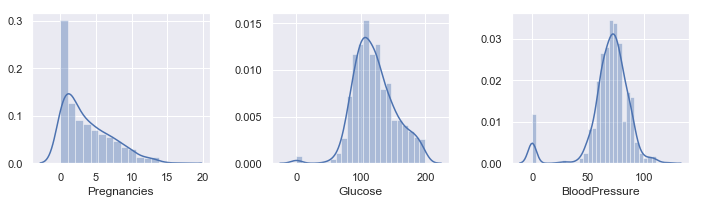

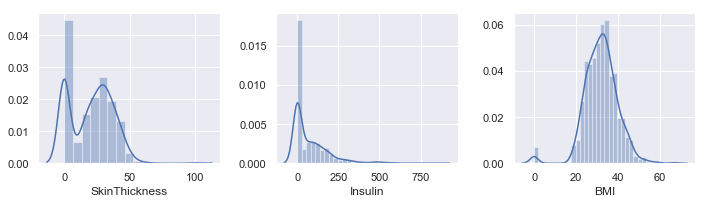

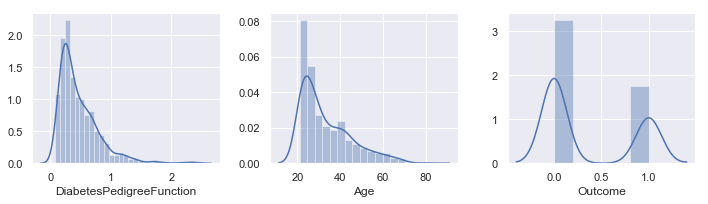

In [12]:
density_plots(df)


### Inference

- Age, DiabetesPedigreeFunction , Pregnancies, Insulin is right skewed.
- Insulin also has zero's, which can be imputed using median
- BMI, Blood Pressure, Glucose is have bimodal distribution, however there are few zero values - if we impute those using mean we should be getting normal distribution
- Skin Thickness also seems to be right skewed and there are zero values - we could use median to impute missing values and get a fairly closer normal distribution

### 8. Zero Replacement

Identify and Replace all the zero values with the mean.

In [13]:
print("Print the number of zero's in each column -")
print('BloodPressure: ',df[df.BloodPressure == 0].BloodPressure.count())
print('Glucose: ',df[df.Glucose == 0].Glucose.count())
print('SkinThickness: ',df[df.SkinThickness == 0].SkinThickness.count())
print('Insulin: ',df[df.Insulin == 0].Insulin.count())
print('BMI: ',df[df.BMI == 0.0].BMI.count())

Print the number of zero's in each column -
BloodPressure:  35
Glucose:  5
SkinThickness:  227
Insulin:  374
BMI:  11


In [14]:
#Replace zero's in the columns with mean and median value

bp_mean= df['BloodPressure'].mean()
df['BloodPressure'] = df['BloodPressure'].replace(0,bp_mean)
print('BloodPressure: ',df[df.BloodPressure == 0].BloodPressure.count())

g_mean= df['Glucose'].mean()
df['Glucose'] = df['Glucose'].replace(0,g_mean)
print('Glucose: ',df[df.Glucose == 0].Glucose.count())

st_median= df['SkinThickness'].median()
df['SkinThickness'] = df['SkinThickness'].replace(0,st_median)
print('SkinThickness: ',df[df.SkinThickness == 0].SkinThickness.count())

i_median= df['Insulin'].median()
df['Insulin'] = df['Insulin'].replace(0,i_median)
print('Insulin: ',df[df.Insulin == 0].Insulin.count())

bmi_mean= df['BMI'].mean()
df['BMI']= df['BMI'].replace(0.0,bmi_mean)
print('BMI: ',df[df.BMI == 0.0].BMI.count())

BloodPressure:  0
Glucose:  0
SkinThickness:  0
Insulin:  0
BMI:  0


### Distribution plot:
Now, let us again look at the distribution plot of the numeric variables after imputation of mean and median to the missing values.

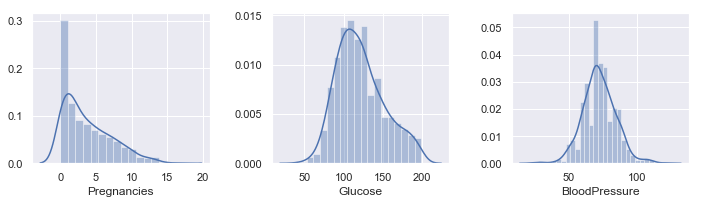

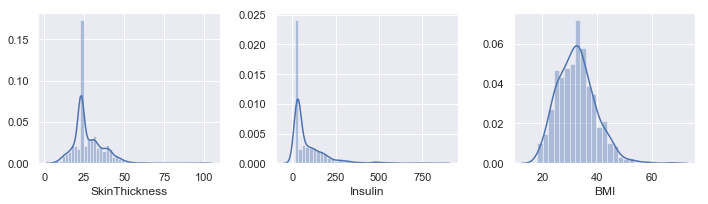

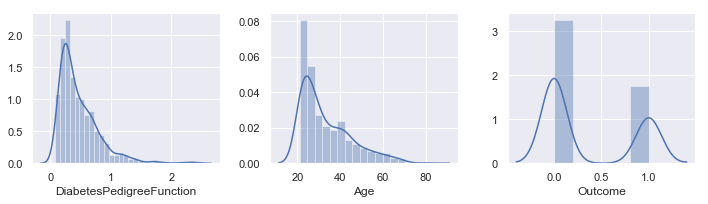

In [15]:
density_plots(df)

### 9. Outliers

In [16]:
def box_plot(df):
    num_cols = list(df._get_numeric_data().columns)
    for i in range(0,len(num_cols),3):
        if len(num_cols) > i+2:
            plt.figure(figsize=(10,3))
            plt.subplot(131)
            sns.boxplot(x=df[num_cols[i]],orient='v')
            plt.subplot(132)            
            sns.boxplot(x=df[num_cols[i+1]],orient='v')
            plt.subplot(133)            
            sns.boxplot(x=df[num_cols[i+2]],orient='v')
            plt.tight_layout()
            plt.show()

        else:
            sns.boxplot(x=df[num_cols[i]],orient='v')

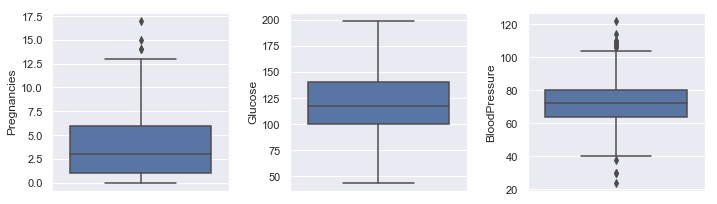

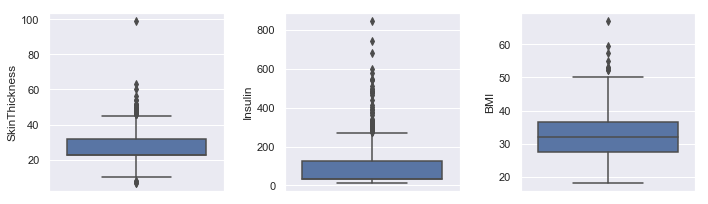

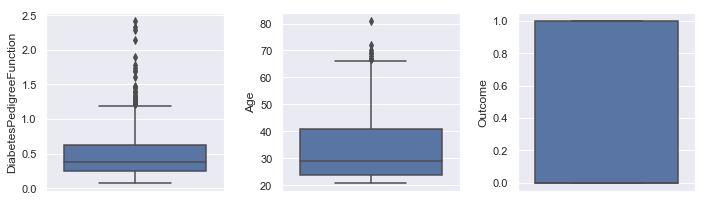

In [17]:
box_plot(df)

### Inference
- There are few outliers in Pregnancies column
- There are lot of outliers in Insulin, DiabetesPedigreeFunction
- Ouliers can also be found in SkinThickness, BloodPressure, BMI
- There are no ouliers in Glucose.

### Strategy to handle outliers:
There are multiple ways in which we can handle outliers -

    - Drop the outliers
    - Alternatively, we can impute the outlier values using mean or median, based on the type of dataset that we are deailing with.

In [18]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [19]:
def impute_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1 - (1.5*iqr)
    fence_high = q3 + (1.5*iqr)    
    
    median = df_in[col_name].loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)].median()
    #df_in[col_name] = np.where((df_in[col_name] > fence_low) | (df_in[col_name] > fence_high),median_i,df_in[col_name])
    #df_in[col_name].loc[~((df_in[col_name] > fence_low) & (df_in[col_name] < fence_high))] = np.nan
    df_in[col_name].loc[(df_in[col_name] < fence_low)] = np.nan
    df_in[col_name].loc[(df_in[col_name] > fence_high)] = np.nan
    df_in[col_name] = df_in[col_name].replace(np.nan,median)
    return df_in

In [20]:
df_in = df.copy()
impute_outlier(df_in,'Insulin')
impute_outlier(df_in,'BloodPressure')
impute_outlier(df_in,'DiabetesPedigreeFunction')
impute_outlier(df_in,'SkinThickness')
impute_outlier(df_in,'BMI')
impute_outlier(df_in,'Age')
df_out= impute_outlier(df_in,'Pregnancies')

In [21]:
df_in.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null float64
Glucose                     768 non-null float64
BloodPressure               768 non-null float64
SkinThickness               768 non-null float64
Insulin                     768 non-null float64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null float64
Outcome                     768 non-null int64
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [22]:
null_values = missing_values(df_in)
if null_values.shape[0] == 0:
    print ("There are no null values in the datasets")
else:
    null_values

There are no null values in the datasets


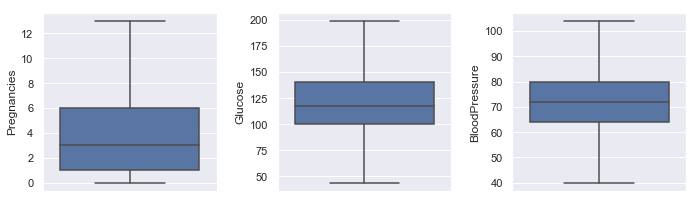

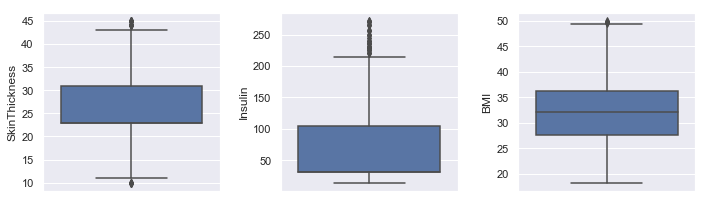

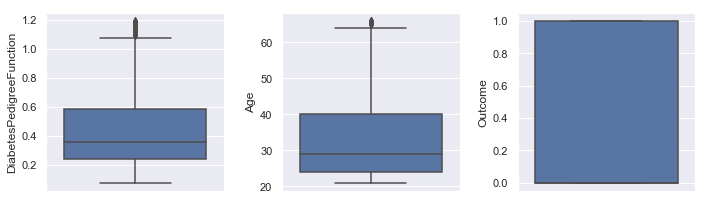

In [23]:
box_plot(df_out)

### 10. Bivariate Analysis¶

In [24]:
def correlation_matrix(df):
    X = df.iloc[:,:-1]  #independent columns
    y = df.iloc[:,-1]    #target column i.e price range
    #get correlations of each features in dataset
    corrmat = df.corr()
    top_corr_features = corrmat.index
    plt.figure(figsize=(10,6))
    #plot heat map
    g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

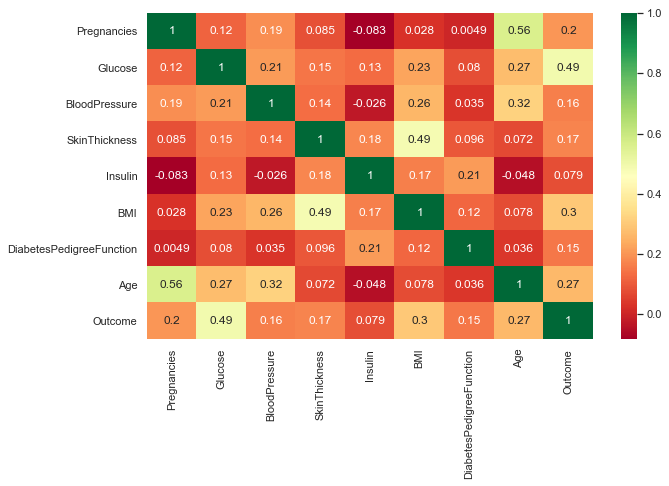

In [25]:
correlation_matrix(df_out)

### Inference:
- The heatmap  indicates that there is no strong correlation between any of the variables
- However, the following pairs has a positive correlation coefficient between them as compared to the other parameters:
    - Pregnancies and Age
    - Insulin and Glucose
    - BMI and Skin thickness
- And with the Outcome value, Glucose and BMI values related the most. So these are the parameters we need to take special care of.

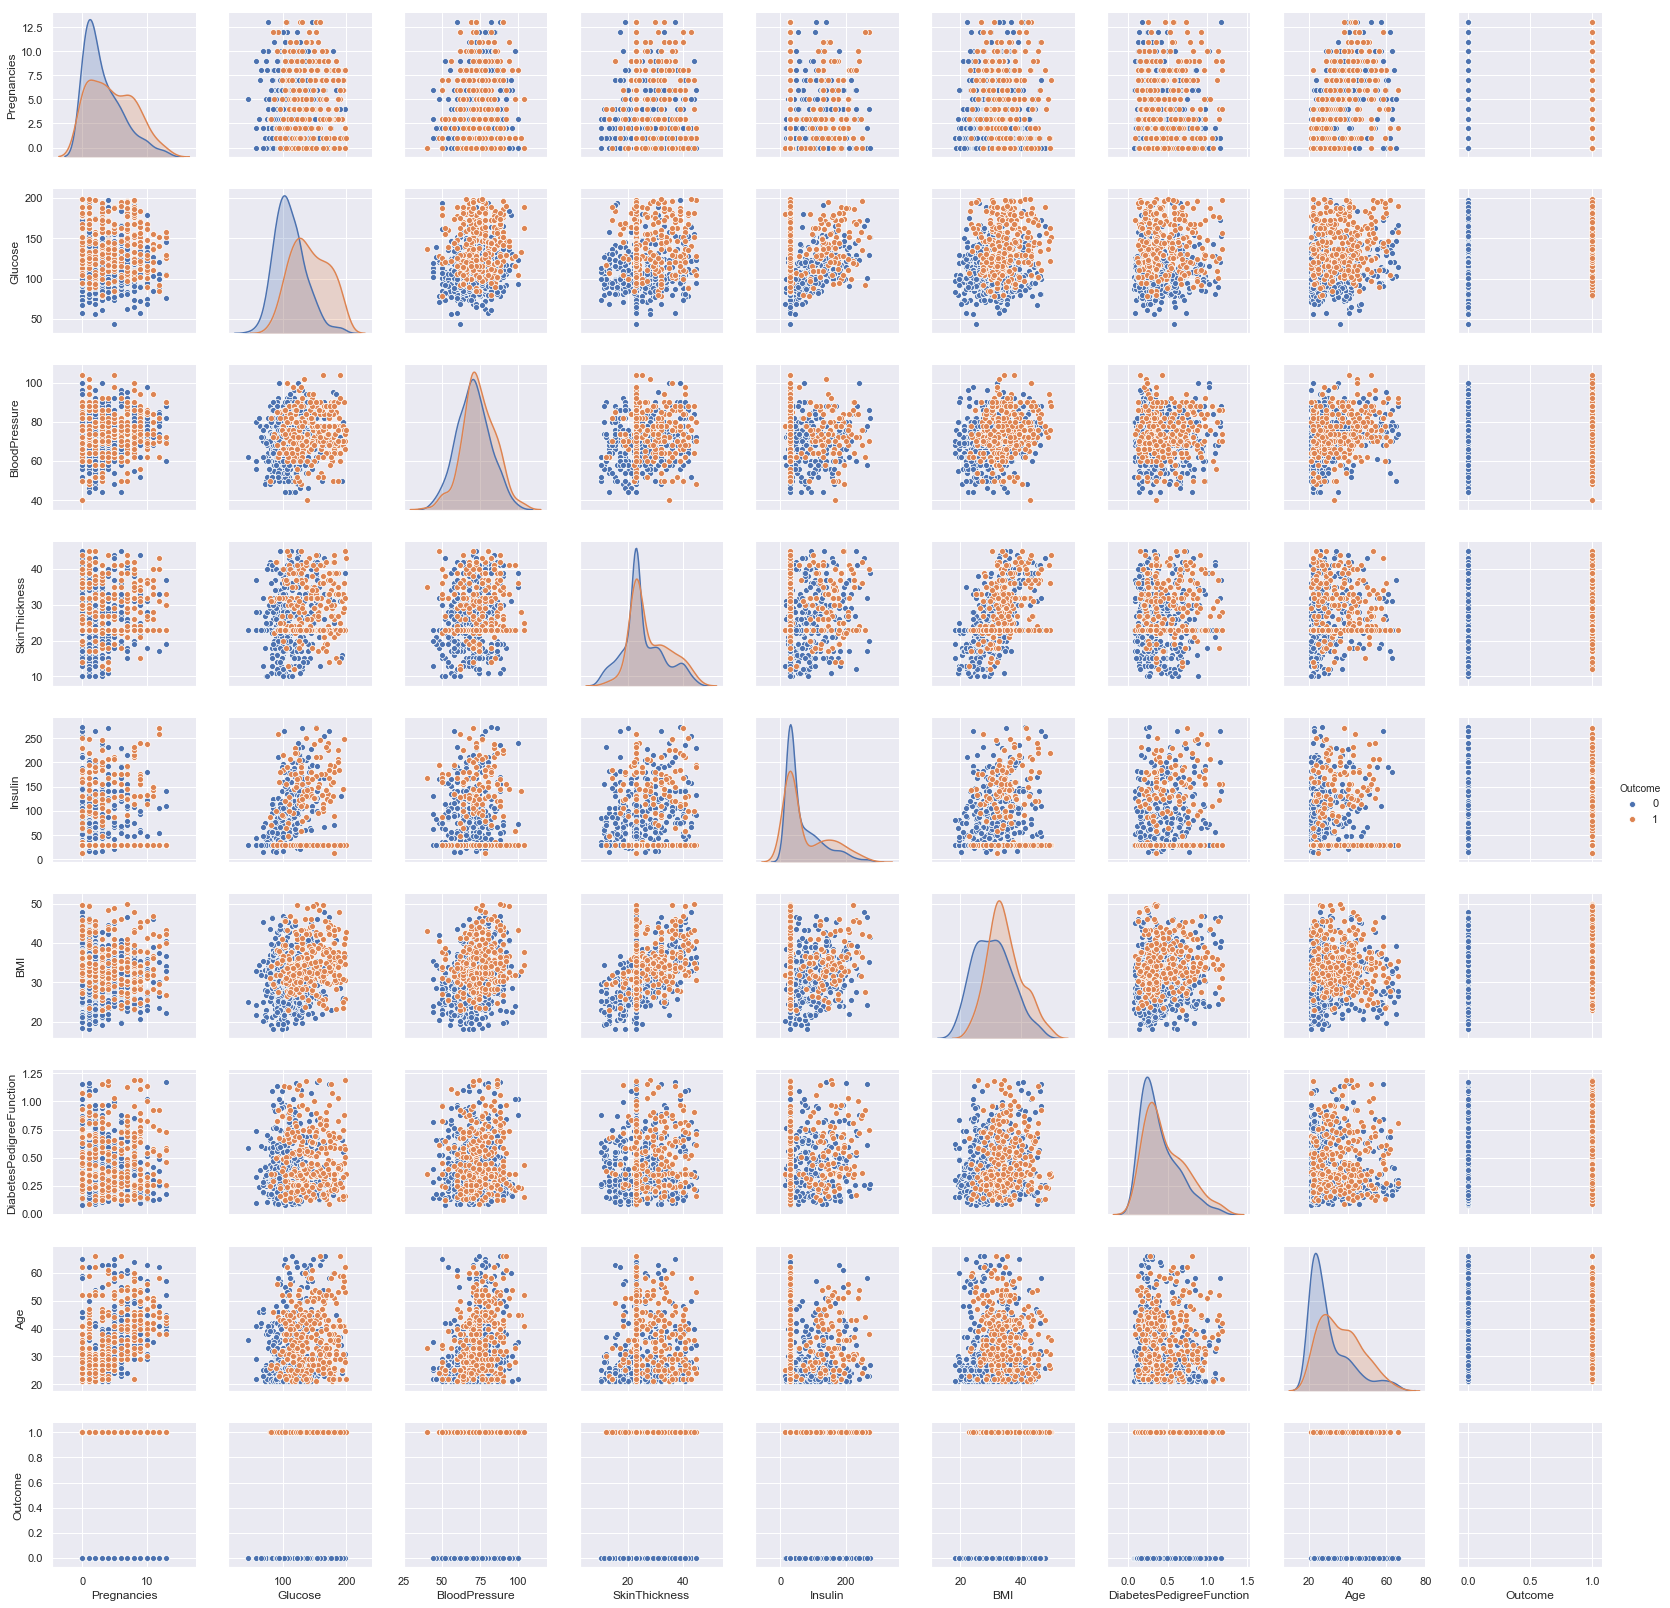

In [26]:
sns.pairplot(data=df_out,hue='Outcome')

### Inference:
- The scatter-plots shows the relation between each and every attribute or features taken pairwise. Looking at the scatter-plots, we can say that no two attributes are able to clearly seperate the two outcome-class instances.
- One other thing that we can deduce from this image is that all the parameters overlap for the Outcome value, i.e., no matter if you are suffering from the diabetes or not, you can have the same parameters.

### 11. RelationShip of predictors with Target

Before delving more into the features, let us first have a look at the target variable 'Outcome'

Text(0.5,0,'Outcome')

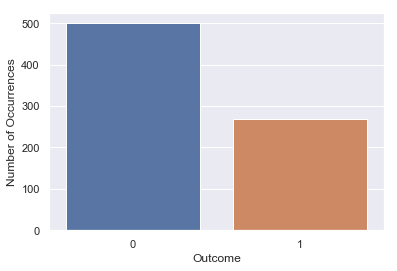

In [27]:
class_variable = df_out['Outcome'].value_counts()

sns.barplot(class_variable.index,class_variable.values)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Outcome', fontsize=12)

In [28]:
df_out['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [29]:
100 * df_out['Outcome'].value_counts() / df_out.shape[0]

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

### Inference :
From the counts looks like there are more number for rows (data) for non diabetic patients than diabetic. There seems to be imbalance in the class

In [30]:
# To split the dataset into train and test datasets
from sklearn.model_selection import train_test_split

# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix, classification_report, average_precision_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, precision_recall_curve

In [31]:
X=df_out.iloc[:,:-1]
y=df_out.iloc[:,-1]

### 12. Standardise input features

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [33]:
X=pd.DataFrame(X,columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin',
           'BMI','DiabetesPedigreeFunction','Age'])
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.678427,0.865276,0.002190,1.164623,-0.674008,0.218711,0.815603,1.560400
1,-0.851320,-1.205989,-0.549019,0.363401,-0.674008,-0.873949,-0.310178,-0.159340
2,1.290326,2.015979,-0.732755,-0.437820,-0.674008,-1.389060,0.999154,-0.068827
3,-0.851320,-1.074480,-0.549019,-0.437820,0.390453,-0.639807,-1.060699,-1.064466
4,-1.157270,0.503626,-2.937592,1.164623,1.630927,1.701606,-0.289784,0.021685


### 13. Build Model

In [34]:
clf = GaussianNB()

for i in range(1,4):
    X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=i,test_size=0.30,stratify=y)
        
    clf.fit(X_train, y_train)
    y_predicted = clf.predict(X_test)
        
    print("Iteration - ",i)     
    print("\nConfusion Matrix ")
    cm = confusion_matrix(y_test,y_predicted)
    print(cm)
    
    print(classification_report(y_test,y_predicted))
    print("=======================================================\n")
    

Iteration -  1

Confusion Matrix 
[[121  29]
 [ 34  47]]
             precision    recall  f1-score   support

          0       0.78      0.81      0.79       150
          1       0.62      0.58      0.60        81

avg / total       0.72      0.73      0.73       231


Iteration -  2

Confusion Matrix 
[[129  21]
 [ 38  43]]
             precision    recall  f1-score   support

          0       0.77      0.86      0.81       150
          1       0.67      0.53      0.59        81

avg / total       0.74      0.74      0.74       231


Iteration -  3

Confusion Matrix 
[[124  26]
 [ 33  48]]
             precision    recall  f1-score   support

          0       0.79      0.83      0.81       150
          1       0.65      0.59      0.62        81

avg / total       0.74      0.74      0.74       231




### Performance Metrics

The confusion matrix outputs the following:
- True positive (TP): Prediction is +ve and X is diabetic, we want that
- True negative (TN): Prediction is -ve and X is healthy, we want that too
- False positive (FP): Prediction is +ve and X is healthy, false alarm, bad
- False negative (FN): Prediction is -ve and X is diabetic, the worst


Accuracy measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

Precision tells us what proportion of data we classified as diabetic, actually were diabetic. It is a ratio of true positives(records classified as diabetic, and which are actually diabetic) to all positives(all records classified as diabetic, irrespective of whether that was the correct classificatio), in other words it is the ratio of

[True Positives/(True Positives + False Positives)]

Recall(sensitivity) tells us what proportion of data that actually were diabetic were classified by us as diabetic. It is a ratio of true positives(records classified as diabetic, and which are actually diabetic) to all the data that were actually diabetic, in other words it is the ratio of

[True Positives/(True Positives + False Negatives)]

#### Metric Selection
Recall shall be the model metric we use to select our best model when there is a high cost associated with False Negative.If a diabetic patient (Actual Positive) goes through the test and predicted as not diabetic (Predicted Negative). The risk  associated with False Negative will be extremely high.

### 14. ROC Curve (Reciever Operator Characteristic Curve)

<Figure size 432x288 with 0 Axes>

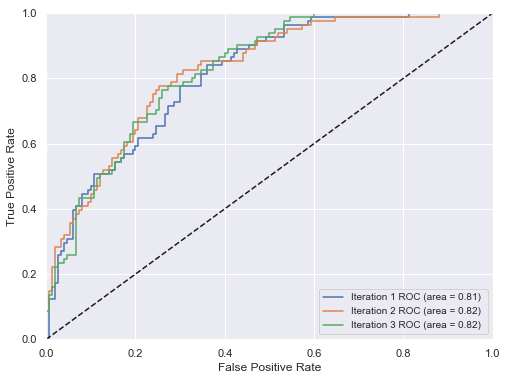

In [35]:
plt.clf()
plt.figure(figsize=(8,6))

for i in range(1,4):
    X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=i,test_size=0.30,stratify=y)
        
    clf.fit(X_train, y_train)
    y_predicted = clf.predict(X_test)
       
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    
    fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label='Iteration %s ROC (area = %0.2f) ' % (i, auc))
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=0, fontsize='small')
plt.show()



From the above curve we see that iteration2 has a better ROC curve with area as 0.82

### 15. Precision - Recall Curve

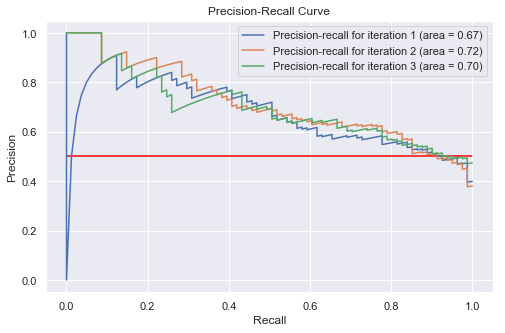

In [36]:
plt.figure(figsize=(8,5))

for i in range(1,4):
    X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=i,test_size=0.30,stratify=y)
        
    clf.fit(X_train, y_train)
    y_predicted = clf.predict(X_test)
    
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    
    precision,recall,thresholds= precision_recall_curve(y_test,  y_pred_proba)
    ap = average_precision_score(y_test, y_pred_proba)
    plt.plot(recall,precision,label='Precision-recall for iteration %s (area = %0.2f)'%(i,ap))
    
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.hlines(y=0.5,xmin=0,xmax=1,color='red')
plt.legend()
plt.show()


This helps us decide the best model interms of precision and recall, since our goal is to have a good recall, we will choose iteration 2

### 16. Precision-Recall Vs Classification Threshold

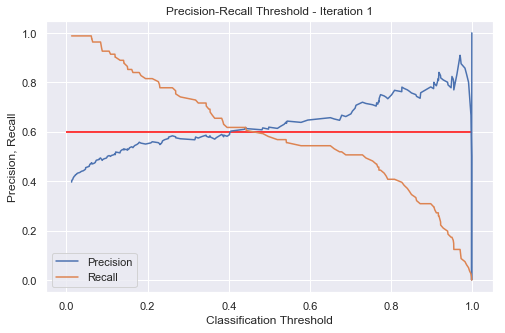

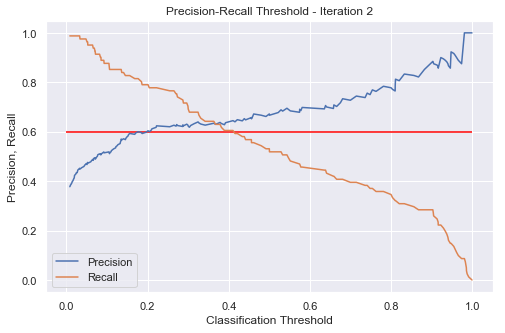

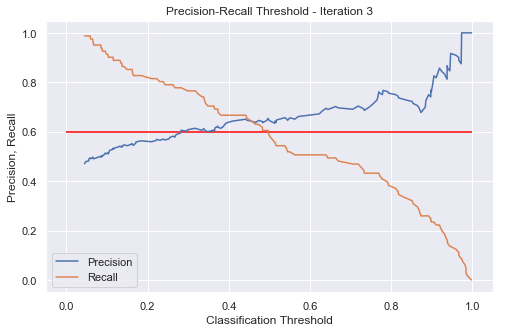

In [37]:
# plt.figure(figsize=(8,5))

for i in range(1,4):
    X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=i,test_size=0.30,stratify=y)
        
    clf.fit(X_train, y_train)
    y_predicted = clf.predict(X_test)
    
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    
    precision,recall,thresholds= precision_recall_curve(y_test,  y_pred_proba)
    
    fig, ax = plt.subplots(figsize=(8,5))

    ax.plot(thresholds,precision[1:],label='Precision')
    ax.plot(thresholds,recall[1:],label='Recall')
    ax.set_xlabel('Classification Threshold')
    ax.set_ylabel('Precision, Recall')
    ax.set_title('Precision-Recall Threshold - Iteration %d'%(i))
    ax.hlines(y=0.6,xmin=0,xmax=1,color='red')
    ax.legend()
    plt.show()


Let's run the model by setting the threshold as 0.2, so that we get high sensitivity (Recall) and low precision

### 17. Final Model

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=2,test_size=0.30,stratify=y)
clf.fit(X_train, y_train)    

y_pred_proba = clf.predict_proba(X_test)[:, 1]
y_pred_test = (y_pred_proba>=0.2).astype('int')
    
print("\nConfusion Matrix :")
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_test).ravel()
print("True Positive - ",tp)
print("True Negative - ",tn)
print("False Negative - ",fn)
print("False Positive - ",fp)

    
print(classification_report(y_test,y_pred_test))


Confusion Matrix :
True Positive -  64
True Negative -  107
False Negative -  17
False Positive -  43
             precision    recall  f1-score   support

          0       0.86      0.71      0.78       150
          1       0.60      0.79      0.68        81

avg / total       0.77      0.74      0.75       231



In [39]:
## Alternatively, we could also use binarize function from sklearn to set the threshold.
from sklearn.preprocessing import binarize
y_pred_class = binarize(y_pred_proba.reshape(1,-1),threshold = 0.20)[0]

cm = confusion_matrix(y_test,y_pred_class)
print(cm)

print(classification_report(y_test,y_pred_class))

[[107  43]
 [ 17  64]]
             precision    recall  f1-score   support

          0       0.86      0.71      0.78       150
          1       0.60      0.79      0.68        81

avg / total       0.77      0.74      0.75       231



In [41]:
recall_score = tp/(tp+fn)
precision_score = tp/(tp+fp)

fscore_0_25 = ((1+0.25**2)*(precision_score*recall_score))/((0.25**2)*precision_score+recall_score)
fscore_0_5 = ((1+0.5**2)*(precision_score*recall_score))/((0.5**2)*precision_score+recall_score)
fscore_1 = ((1+1**2)*(precision_score*recall_score))/((1**2)*precision_score+recall_score)


print(fscore_0_25)
print(fscore_0_5)
print(fscore_1)



0.6068042387060791
0.6286836935166994
0.6808510638297871


In [47]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

kfold = model_selection.KFold(n_splits=3, random_state=7)
modelCV_lr = LogisticRegression()
scoring = 'f1_macro'
results = model_selection.cross_val_score(modelCV_lr, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.734


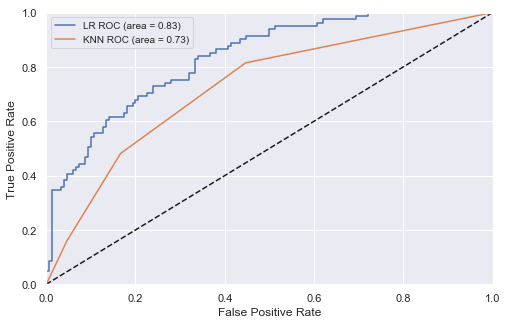

In [56]:
plt.figure(figsize=(8,5))

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=2,test_size=0.30,stratify=y)

model_lr = LogisticRegression()
model_KNN = KNeighborsClassifier(n_neighbors=3)


model_lr.fit(X_train, y_train)
y_predicted_lr = model_lr.predict(X_test)
y_pred_proba_lr = model_lr.predict_proba(X_test)[:, 1]
fpr_lr,tpr_lr,thresholds_lr= roc_curve(y_test,  y_pred_proba_lr)
auc_lr = roc_auc_score(y_test, y_pred_proba_lr)
plt.plot(fpr_lr,tpr_lr,label='LR ROC (area = %0.2f)'%(auc_lr))

model_KNN.fit(X_train, y_train)
y_predicted_KNN = model_KNN.predict(X_test)
y_pred_proba_KNN = model_KNN.predict_proba(X_test)[:, 1]
fpr_KNN,tpr_KNN,thresholds_KNN = roc_curve(y_test,  y_pred_proba_KNN)
auc_KNN = roc_auc_score(y_test, y_pred_proba_KNN)
plt.plot(fpr_KNN,tpr_KNN,label='KNN ROC (area = %0.2f)'%(auc_KNN))
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=0, fontsize='small')
plt.show()



In [ ]:
parameters = {'max_depth':[1,2,3,4,5]}